# Bolidozor FITS files time restorer

For use of this notebook you must have mounted space.astro.cz storage server to local filesystem. It is possible to do with `sshfs`
```bash
  sshfs <user>@space.astro.cz /<mnt folder>
```
Then you must set path of `<mnt foler>` to `path` variable.

In [53]:
import os
import datetime
import numpy
import scipy.signal
from astropy.io import fits
import matplotlib.pyplot as plt
import matplotlib.dates as md
%matplotlib inline  

In [48]:
paths = ['/home/roman/mnt/server-space/storage/bolidozor/ZVPP/ZVPP-R6/snapshots/2017/09/']
times = numpy.ndarray((0,2))
start_time = datetime.datetime.now()
fits_browsed = 0
for path in paths:
    for root, dirs, files in os.walk(path):
        print("")
        print(root, " ")
        for name in files:
            if name.endswith(("snap.fits")):
                hdulist = fits.open(os.path.join(root, name))
                DATE_ts = datetime.datetime.strptime(hdulist[1].header['DATE'], '%Y-%m-%dT%H:%M:%S').timestamp()*1000+2*60*60*1000
                crval = hdulist[1].header['CRVAL2']
                #print(DATE_ts, crval)
                time = [DATE_ts - hdulist[1].header['CDELT2']* hdulist[1].header['NAXIS2'], crval]
                times = numpy.vstack( [times, time]  )
                hdulist.close()
                print("+", end='')
                fits_browsed += 1
times.sort(axis=0)
print("")
print("===================================")
print(fits_browsed, "was successfully processed")
print("It takes", datetime.datetime.now()-start_time)



/home/roman/mnt/server-space/storage/bolidozor/ZVPP/ZVPP-R6/snapshots/2017/09/  

/home/roman/mnt/server-space/storage/bolidozor/ZVPP/ZVPP-R6/snapshots/2017/09/01  

/home/roman/mnt/server-space/storage/bolidozor/ZVPP/ZVPP-R6/snapshots/2017/09/01/10  
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
/home/roman/mnt/server-space/storage/bolidozor/ZVPP/ZVPP-R6/snapshots/2017/09/01/22  
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
/home/roman/mnt/server-space/storage/bolidozor/ZVPP/ZVPP-R6/snapshots/2017/09/01/09  
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
/home/roman/mnt/server-space/storage/bolidozor/ZVPP/ZVPP-R6/snapshots/2017/09/01/03  
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
/home/roman/mnt/server-space/storage/bolidozor/ZVPP/ZVPP-R6/snapshots/2017/09/01/04  
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
/home/roman/mnt/server-space/storage/bolidozor/ZVPP/ZVPP-R6/snapshots/2017/09/01/17  
+++++++++++++

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
/home/roman/mnt/server-space/storage/bolidozor/ZVPP/ZVPP-R6/snapshots/2017/09/02/06  
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
/home/roman/mnt/server-space/storage/bolidozor/ZVPP/ZVPP-R6/snapshots/2017/09/02/01  
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
/home/roman/mnt/server-space/storage/bolidozor/ZVPP/ZVPP-R6/snapshots/2017/09/02/12  
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
/home/roman/mnt/server-space/storage/bolidozor/ZVPP/ZVPP-R6/snapshots/2017/09/02/18  
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
/home/roman/mnt/server-space/storage/bolidozor/ZVPP/ZVPP-R6/snapshots/2017/09/02/20  
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
/home/roman/mnt/server-space/storage/bolidozor/ZVPP/ZVPP-R6/snapshots/2017/09/03  

/home/roman/mnt/server-space/storage/bolidozor/ZVPP/ZVPP-R6/snapshots/2017/09/03/17  
+++++++++++++++++++++++++++++++++++

# SYSDATE1
This cell browse files with `SYSDATE1` parametr in header. (works only on some stations)

In [68]:
paths = ['/home/roman/mnt/server-space/storage/bolidozor/ZVPP/ZVPP-R6/snapshots/2017/09/03/',
        '/home/roman/mnt/server-space/storage/bolidozor/ZVPP/ZVPP-R6/snapshots/2017/09/04/',
        '/home/roman/mnt/server-space/storage/bolidozor/ZVPP/ZVPP-R6/snapshots/2017/09/05/']
times_ts = numpy.ndarray((0,2))
start_time = datetime.datetime.now()
fits_browsed = 0
for path in paths:
    for root, dirs, files in os.walk(path):
        print("")
        print(root, " ")
        for name in files:
            if name.endswith(("snap.fits")):
                try:
                    hdulist = fits.open(os.path.join(root, name))
                    sysdate = hdulist[1].header['SYSDATE1']
                    sysdate_beg = sysdate - hdulist[1].header['CDELT2']* hdulist[1].header['NAXIS2']
                    crval = hdulist[1].header['CRVAL2']
                    time = [sysdate_beg, crval]
                    times_ts = numpy.vstack( [times_ts, time]  )
                    hdulist.close()
                    print("+", end='')
                    fits_browsed += 1
                except Exception:
                    print("-", end='')
times_ts.sort(axis=0)
print("")
print("===================================")
print(fits_browsed, "was successfully processed")
print("It takes", datetime.datetime.now()-start_time)


/home/roman/mnt/server-space/storage/bolidozor/ZVPP/ZVPP-R6/snapshots/2017/09/03/  

/home/roman/mnt/server-space/storage/bolidozor/ZVPP/ZVPP-R6/snapshots/2017/09/03/17  
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
/home/roman/mnt/server-space/storage/bolidozor/ZVPP/ZVPP-R6/snapshots/2017/09/03/04  
------------------------------------------------------------
/home/roman/mnt/server-space/storage/bolidozor/ZVPP/ZVPP-R6/snapshots/2017/09/03/09  
-----------------------------------------------------------
/home/roman/mnt/server-space/storage/bolidozor/ZVPP/ZVPP-R6/snapshots/2017/09/03/03  
------------------------------------------------------------
/home/roman/mnt/server-space/storage/bolidozor/ZVPP/ZVPP-R6/snapshots/2017/09/03/10  
------------------------------------------------------------
/home/roman/mnt/server-space/storage/bolidozor/ZVPP/ZVPP-R6/snapshots/2017/09/03/22  
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
/home/roman/mnt/server-space/stor

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
/home/roman/mnt/server-space/storage/bolidozor/ZVPP/ZVPP-R6/snapshots/2017/09/05/01  
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
/home/roman/mnt/server-space/storage/bolidozor/ZVPP/ZVPP-R6/snapshots/2017/09/05/05  
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
/home/roman/mnt/server-space/storage/bolidozor/ZVPP/ZVPP-R6/snapshots/2017/09/05/11  
+++++++++++++++++
/home/roman/mnt/server-space/storage/bolidozor/ZVPP/ZVPP-R6/snapshots/2017/09/05/08  
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
/home/roman/mnt/server-space/storage/bolidozor/ZVPP/ZVPP-R6/snapshots/2017/09/05/02  
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
2555 was successfully processed
It takes 0:02:46.477653


# Plotter

Next cell plots a graph of time differences.

Positive number means SYSDATE is ahead of CRVAL2 (radio-observer time is late).<br/>
Negativ value means SYSDATE is behind CRVAL2 (radio-observer time is faster).

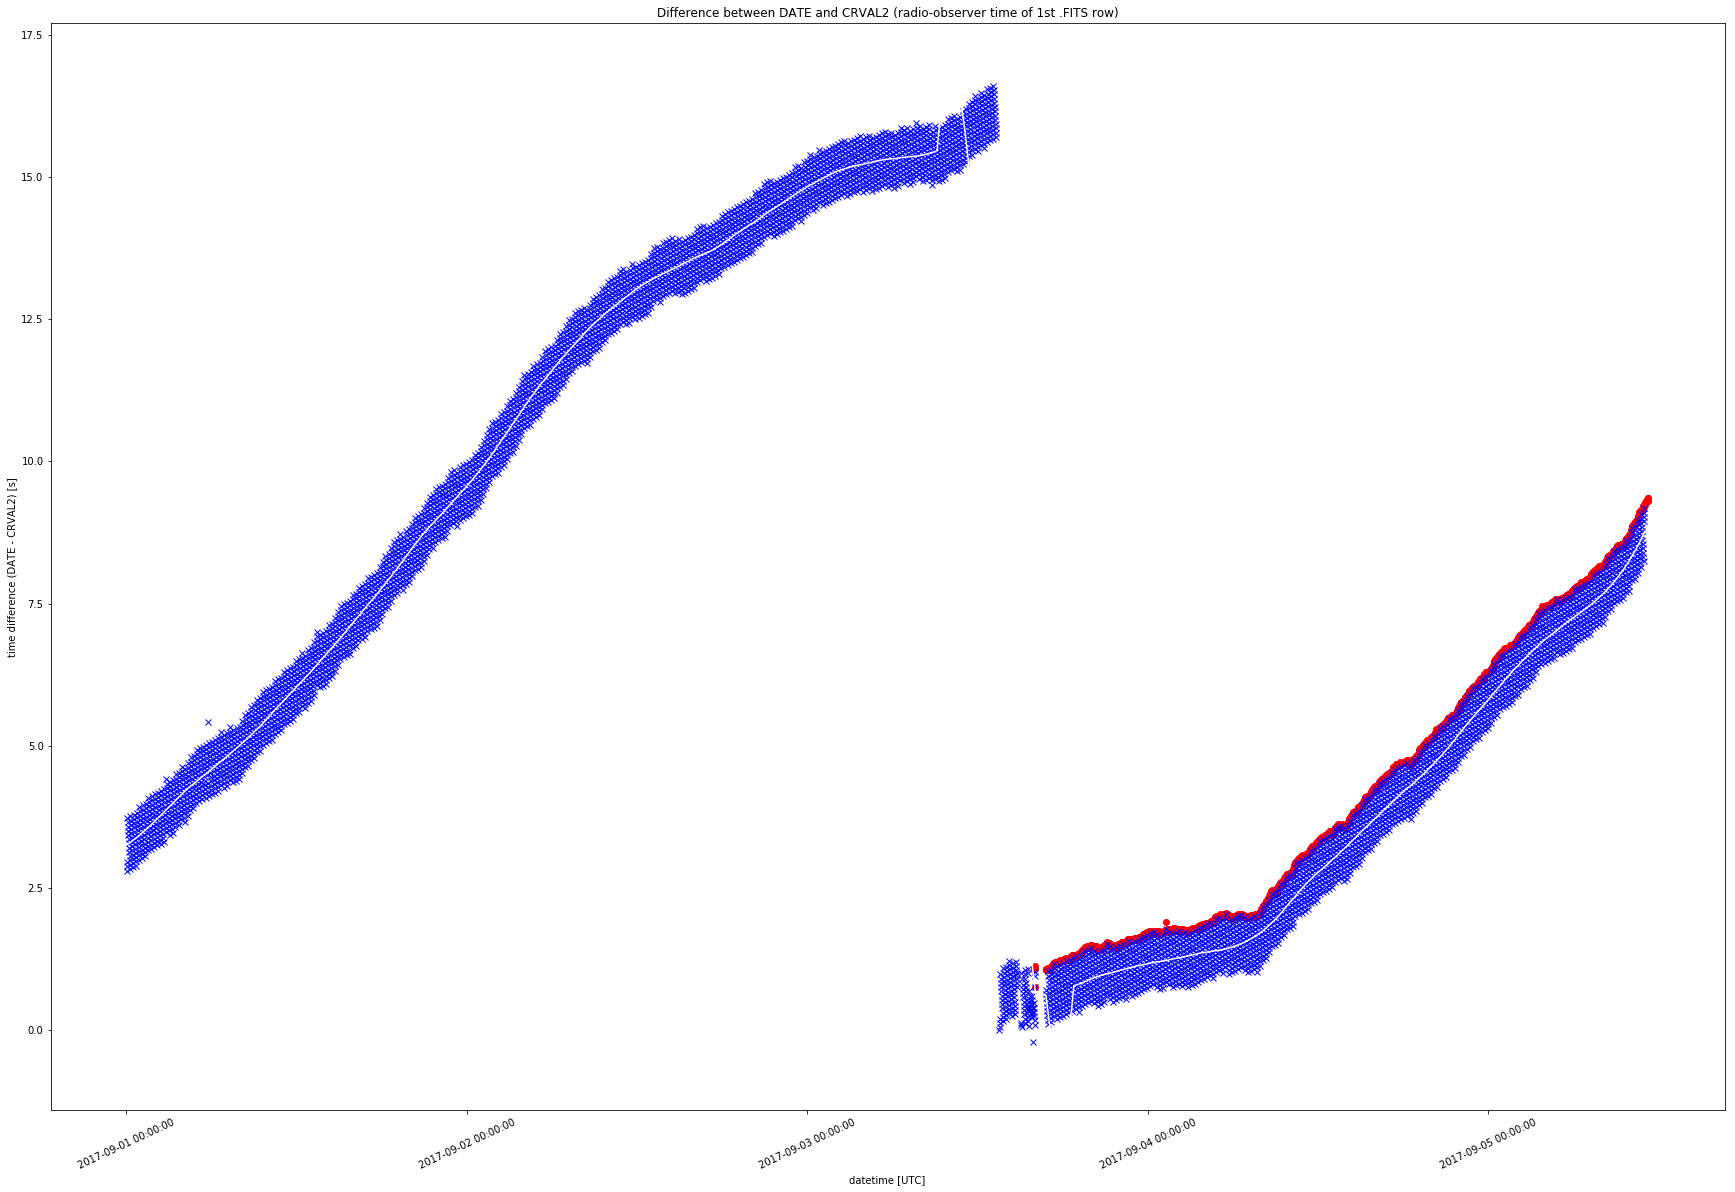

In [80]:
plt.figure(figsize=(30, 20))

data=md.date2num([datetime.datetime.fromtimestamp(ts, datetime.timezone.utc) for ts in times[:,0]/1000])
data_ts=md.date2num([datetime.datetime.fromtimestamp(ts, datetime.timezone.utc) for ts in times_ts[:,0]/1000])
plt.xticks( rotation=25 )
ax=plt.gca()
xfmt = md.DateFormatter('%Y-%m-%d %H:%M:%S')
ax.xaxis.set_major_formatter(xfmt)
ax.set_title('Difference between DATE and CRVAL2 (radio-observer time of 1st .FITS row)')
ax.set_xlabel('datetime [UTC]')
ax.set_ylabel('time difference (DATE - CRVAL2) [s]')

plt.plot(data_ts, (times_ts[:,0]-times_ts[:,1])/1000.0, 'or')
plt.plot(data, (times[:,0]-times[:,1])/1000.0, 'xb')
plt.plot(data, scipy.signal.savgol_filter(times[:,0]-times[:,1],501, 3)/1000.0, 'w')
plt.show()

<br>
# Calc time difference of one file

In [18]:
fits_path = '/home/roman/mnt/server-space/storage/bolidozor/ZVPP/ZVPP-R6/snapshots/2017/09/04/19/20170904192530311_ZVPP-R6_snap.fits'

print("")
hdulist = fits.open(fits_path)
sysdate = hdulist[1].header['SYSDATE1']
#sysdate_beg = sysdate - hdulist[1].header['CDELT2']* hdulist[1].header['NAXIS2']
DATE_ts = datetime.datetime.strptime(hdulist[1].header['DATE-OBS'], '%Y-%m-%dT%H:%M:%S').timestamp()*1000.0
crval = hdulist[1].header['CRVAL2']
hdulist.close()

time = (DATE_ts - crval)/1000.0
if time>0:
    print("difference between times is", time, "s. (SYSDATE is ahead, radio-observer time is late)")
else:
    print("difference between times is", time, "s. (CRVAL2 is ahead, radio-observer time is in the future :-) )")


difference between times is -7200.311 s. (CRVAL2 is ahead, radio-observer time is in the future :-) )
